# Wine Quality Prediction

**1. IMPORT LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings('ignore')

**2. IMPORT DATASET**

In [ ]:
df = pd.read_csv("winequality.csv")
df.tail(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6487,red,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
6488,red,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
6489,red,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
6490,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6491,red,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.40,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.216246,1.295779,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339519,0.164621,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318759,0.145242,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056031,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531134,0.148804,0.22000,0.43000,0.51000,0.60000,2.00000


In [ ]:
df.isnull().sum()


,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,2
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [ ]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mean())

df.isnull().sum().sum()


0

**3. EXPLORATORY DATA ANALYSIS**

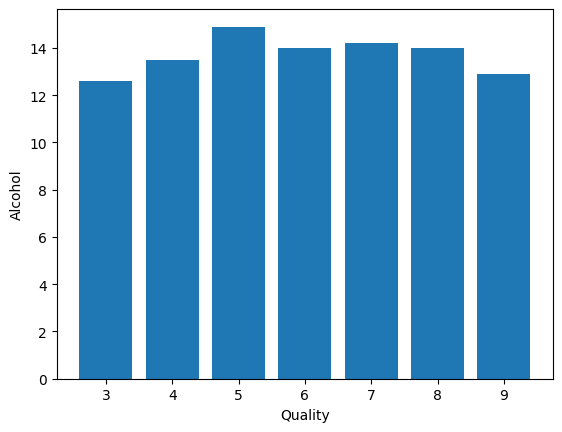

In [ ]:
plt.bar(df['quality'], df['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

Unique values in column 'type': ['white' 'red']


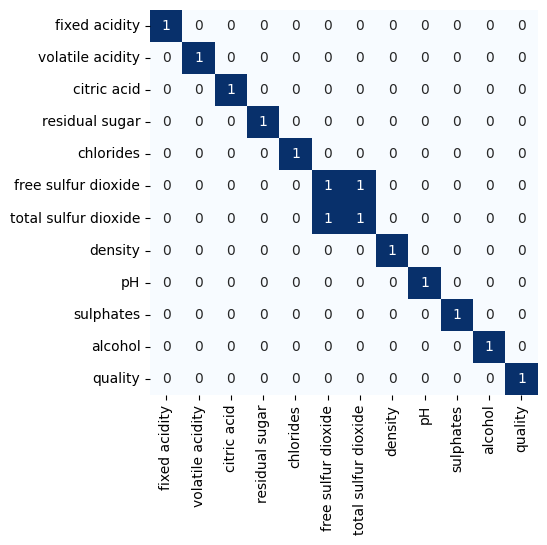

In [ ]:
# Identify non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['number']).columns

# Print the unique values in the non-numeric columns to identify the issue
for col in non_numeric_cols:
    print(f"Unique values in column '{col}': {df[col].unique()}")

# Decide how to handle non-numeric columns:
# 1. Remove them if they are not relevant for correlation analysis.
# 2. Convert them to numerical values if possible (e.g., using one-hot encoding).

# Example: Removing non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(5, 5))
sb.heatmap(df_numeric.corr() > 0.7, annot=True, cbar=False, cmap="Blues")
plt.show()

In [ ]:
df = df.drop('total sulfur dioxide', axis=1)

**4. MODEL DEVELOPMENT**

In [ ]:
df['best quality'] = [1 if x > 5 else 0 for x in df.quality]

In [ ]:
df.replace({'white': 1, 'red': 0}, inplace=True)


In [ ]:
features = df.drop(['quality', 'best quality'], axis=1)
target = df['best quality']

xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=40)

xtrain.shape, xtest.shape


((5197, 11), (1300, 11))

In [ ]:
norm = MinMaxScaler()
xtrain = norm.fit_transform(xtrain)
xtest = norm.transform(xtest)

In [ ]:
model = RandomForestClassifier()
model.fit(xtrain,ytrain)

RandomForestClassifier()

**5. MODEL EVALUATION**

In [ ]:
x_test_prediction = model.predict(xtest)
test_data_accuracy = accuracy_score(x_test_prediction, ytest)

In [ ]:
print('Accuracy : ', test_data_accuracy)

Accuracy :  0.8292307692307692


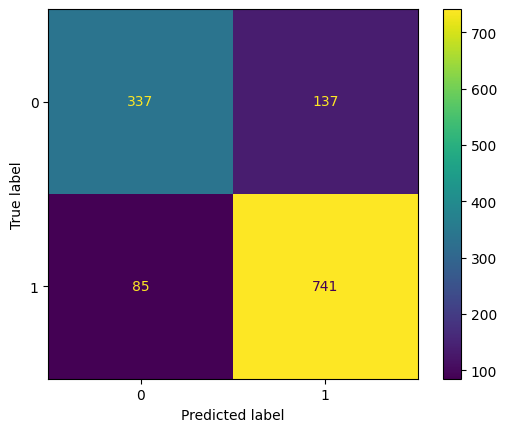

In [ ]:
cm = confusion_matrix(ytest, model.predict(xtest))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
print(metrics.classification_report(ytest,model.predict(xtest)))


              precision    recall  f1-score   support

           0       0.80      0.71      0.75       474
           1       0.84      0.90      0.87       826

    accuracy                           0.83      1300
   macro avg       0.82      0.80      0.81      1300
weighted avg       0.83      0.83      0.83      1300



In [ ]:
input_data = (7.5,0.5,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.8,10.5)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the data as we are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==1):
  print('Good Quality Wine')
else:
  print('Bad Quality Wine')

[0]
Bad Quality Wine
